In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Import des fichiers
hosts_df = pd.read_csv('olympic_hosts.csv')
medals_df = pd.read_csv('olympic_medals.csv')

In [2]:
# Renommage de la colonne 'slug_game' pour avoir une cohésion
medals_df = medals_df.rename({'slug_game': 'game_slug'}, axis=1)
medals_df.columns

Index(['Unnamed: 0', 'discipline_title', 'game_slug', 'event_title',
       'event_gender', 'medal_type', 'participant_type', 'participant_title',
       'athlete_url', 'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')

In [3]:
# Supprimer les colonnes non nécessaires
medals_df.drop(['Unnamed: 0', 'participant_title', 'athlete_url'], axis=1, inplace=True)
print(medals_df.head())

  discipline_title     game_slug    event_title event_gender medal_type  \
0          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
1          Curling  beijing-2022  Mixed Doubles        Mixed       GOLD   
2          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
3          Curling  beijing-2022  Mixed Doubles        Mixed     SILVER   
4          Curling  beijing-2022  Mixed Doubles        Mixed     BRONZE   

  participant_type     athlete_full_name country_name country_code  \
0         GameTeam  Stefania CONSTANTINI        Italy           IT   
1         GameTeam          Amos MOSANER        Italy           IT   
2         GameTeam      Kristin SKASLIEN       Norway           NO   
3         GameTeam    Magnus NEDREGOTTEN       Norway           NO   
4         GameTeam         Almida DE VAL       Sweden           SE   

  country_3_letter_code  
0                   ITA  
1                   ITA  
2                   NOR  
3                   NOR 

In [4]:
# Extraire les données qui concerne la France
france_medals = medals_df[medals_df['country_name'] == 'France']
print(france_medals.head())

     discipline_title     game_slug              event_title event_gender  \
26   Freestyle Skiing  beijing-2022  Women's Freeski Big Air        Women   
88          Snowboard  beijing-2022  Women's Snowboard Cross        Women   
139    Figure skating  beijing-2022                Ice Dance        Mixed   
140    Figure skating  beijing-2022                Ice Dance        Mixed   
172          Biathlon  beijing-2022     Men's 12.5km Pursuit          Men   

    medal_type participant_type       athlete_full_name country_name  \
26      SILVER          Athlete             Tess LEDEUX       France   
88      SILVER          Athlete         Chloe TRESPEUCH       France   
139       GOLD         GameTeam     Gabriella PAPADAKIS       France   
140       GOLD         GameTeam       Guillaume CIZERON       France   
172       GOLD          Athlete  Quentin FILLON MAILLET       France   

    country_code country_3_letter_code  
26            FR                   FRA  
88            FR      

In [5]:
#Regroupement des données par la colonne "game_slug" et comptage du nombre de médailles
medals_count = france_medals.groupby(['game_slug'])['medal_type'].count().reset_index()
print(medals_count.head())

          game_slug  medal_type
0  albertville-1992          10
1    amsterdam-1928          21
2      antwerp-1920          45
3       athens-1896          11
4       athens-2004          36


In [6]:
# Renommage des deux colonnes
medals_count.columns = ['game_slug', 'medal_count']
print(medals_count.head())

          game_slug  medal_count
0  albertville-1992           10
1    amsterdam-1928           21
2      antwerp-1920           45
3       athens-1896           11
4       athens-2004           36


In [7]:
# Fusion avec des données de "hosts_df" et "medals_count" 
merged_df = hosts_df.merge(medals_count, on='game_slug', how='left')
# Remplissage des valeurs manquantes avec 0
merged_df['medal_count'].fillna(0, inplace=True)  
print(merged_df.head())

   index         game_slug         game_end_date       game_start_date  \
0      0      beijing-2022  2022-02-20T12:00:00Z  2022-02-04T15:00:00Z   
1      1        tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z   
2      2  pyeongchang-2018  2018-02-25T08:00:00Z  2018-02-08T23:00:00Z   
3      3          rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z   
4      4        sochi-2014  2014-02-23T16:00:00Z  2014-02-07T04:00:00Z   

        game_location         game_name game_season  game_year  medal_count  
0               China      Beijing 2022      Winter       2022         15.0  
1               Japan        Tokyo 2020      Summer       2020         37.0  
2   Republic of Korea  PyeongChang 2018      Winter       2018         17.0  
3              Brazil          Rio 2016      Summer       2016         45.0  
4  Russian Federation        Sochi 2014      Winter       2014         15.0  


In [8]:
#Création de la colonne 'is_host'. Si game_location = 'France' ALORS 1 SINON 0.
merged_df['is_host'] = merged_df['game_location'].apply(lambda x: 1 if 'France' in x else 0)
#Création de la colonne "year" avec les données de la colonne "game_year"
merged_df['year'] = merged_df['game_year']
#Création de la colonne 'season'. Si game_season = 'Summer' ALORS 1 SINON 0.
merged_df['season'] = merged_df['game_season'].apply(lambda x: 1 if x == 'Summer' else 0)
print(merged_df.head())

# Sélection des caractéristiques
X = merged_df[['year', 'season', 'is_host']]
# Variable cible (à prédire) 'medal_count' 
y = merged_df['medal_count']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   index         game_slug         game_end_date       game_start_date  \
0      0      beijing-2022  2022-02-20T12:00:00Z  2022-02-04T15:00:00Z   
1      1        tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z   
2      2  pyeongchang-2018  2018-02-25T08:00:00Z  2018-02-08T23:00:00Z   
3      3          rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z   
4      4        sochi-2014  2014-02-23T16:00:00Z  2014-02-07T04:00:00Z   

        game_location         game_name game_season  game_year  medal_count  \
0               China      Beijing 2022      Winter       2022         15.0   
1               Japan        Tokyo 2020      Summer       2020         37.0   
2   Republic of Korea  PyeongChang 2018      Winter       2018         17.0   
3              Brazil          Rio 2016      Summer       2016         45.0   
4  Russian Federation        Sochi 2014      Winter       2014         15.0   

   is_host  year  season  
0        0  2022       0  
1        0  2020       1  

In [9]:
# Modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Prédiction et évaluation pour le modèle de régression linéaire
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f'1/ Modèle de régression linéaire:')
print(f'MSE(Mean Squared Error): {linear_mse}')

# Prédiction nombre de médailles pour La France aux JO 2024 avec le modèle de Régression Linéaire
linear_prediction_2024 = linear_model.predict([[2024, 1, 1]])
print(f'Nombre de médailles prédites pour la France aux JO 2024 : {linear_prediction_2024[0]}')

1/ Modèle de régression linéaire:
MSE(Mean Squared Error): 131.90475569323505
Nombre de médailles prédites pour la France aux JO 2024 : 56.624104659435716


In [11]:
# Modèle RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Prédiction et évaluation pour le modèle RandomForest
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f'2/ Modèle RandomForest:')
print(f'MSE(Mean Squared Error): {rf_mse}')

# Prédiction nombre de médailles pour La France aux JO 2024 avec le modèle RandomForest
rf_prediction_2024 = rf_model.predict([[2024, 1, 1]])
print(f'Nombre de médailles prédites pour la France aux JO 2024: {rf_prediction_2024[0]}')

2/ Modèle RandomForest:
MSE(Mean Squared Error): 285.9632272727273
Nombre de médailles prédites pour la France aux JO 2024: 41.13


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Modèle Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [16]:
# Prédiction et évaluation pour le modèle Gradient Boosting Regressor
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'3/ Modèle Gradient Boosting Regressor:')
print(f'MSE(Mean Squared Error: {gb_mse}')

# Prédiction nombre de médailles pour La France aux JO 2024 avec le modèle Gradient Boosting Regressor
gb_prediction_2024 = gb_model.predict([[2024, 1, 1]])
print(f'Nombre de médailles prédites pour la France aux JO 2024 : {gb_prediction_2024[0]}')

3/ Modèle Gradient Boosting Regressor:
MSE(Mean Squared Error: 162.43368023720302
Nombre de médailles prédites pour la France aux JO 2024 : 41.02715040543047


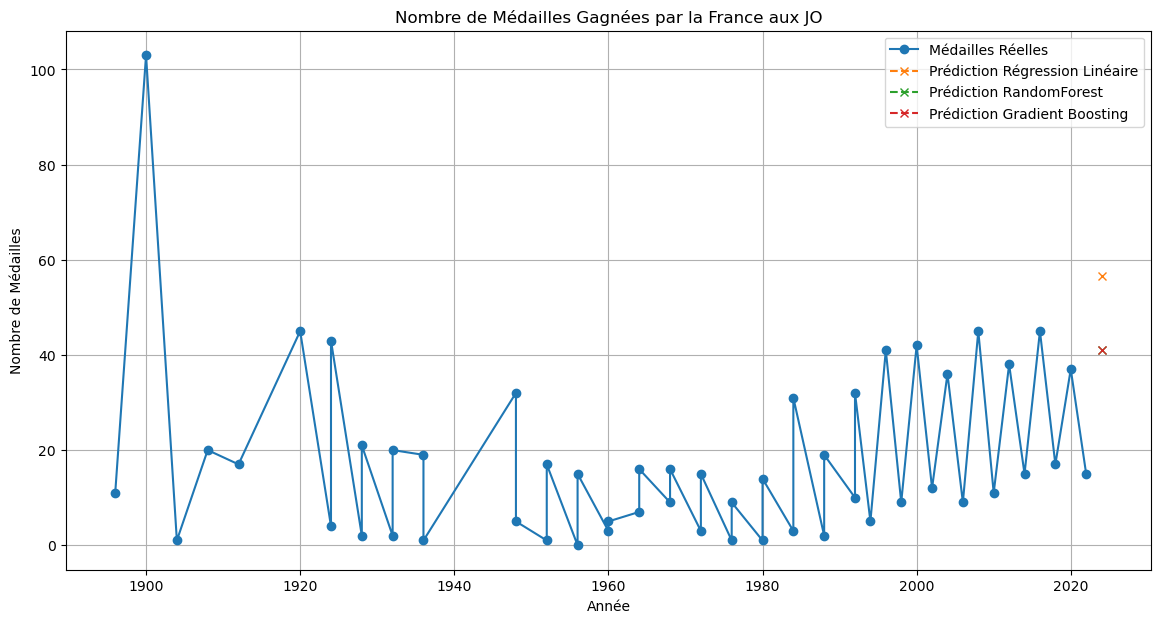

In [18]:
#Pour test
import numpy as np
import matplotlib.pyplot as plt

results = merged_df[['year', 'medal_count']].drop_duplicates().sort_values(by='year').copy()
results = pd.concat([results, pd.DataFrame({'year': [2024], 'medal_count': [None]})], ignore_index=True)
results['Linear_Regression'] = results.apply(lambda row: linear_model.predict([[row['year'], 1, 1]])[0] if row['year'] == 2024 else np.nan, axis=1)
results['Random_Forest'] = results.apply(lambda row: rf_model.predict([[row['year'], 1, 1]])[0] if row['year'] == 2024 else np.nan, axis=1)
results['Gradient_Boosting'] = results.apply(lambda row: gb_model.predict([[row['year'], 1, 1]])[0] if row['year'] == 2024 else np.nan, axis=1)

plt.figure(figsize=(14, 7))
plt.plot(results['year'], results['medal_count'], marker='o', label='Médailles Réelles')
plt.plot(results['year'], results['Linear_Regression'], marker='x', linestyle='--', label='Prédiction Régression Linéaire')
plt.plot(results['year'], results['Random_Forest'], marker='x', linestyle='--', label='Prédiction RandomForest')
plt.plot(results['year'], results['Gradient_Boosting'], marker='x', linestyle='--', label='Prédiction Gradient Boosting')
plt.xlabel('Année')
plt.ylabel('Nombre de Médailles')
plt.title('Nombre de Médailles Gagnées par la France aux JO')


plt.legend()
plt.grid(True)
plt.show()

In [ ]:
results.to_json('results.json', orient='records')

In [19]:
#Aperçu d'un des tests : Prédiction des JO 2020 pour vérifer la fiabilité des diiférents modèles
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Chargement des données
hosts_df = pd.read_csv('olympic_hosts.csv')
medals_df = pd.read_csv('olympic_medals.csv')

# Supprimer les colonnes non nécessaires
medals_df.drop(['Unnamed: 0', 'participant_title', 'athlete_url'], axis=1, inplace=True)

# Extraire les données concernant la France
france_medals = medals_df[medals_df['country_name'] == 'France']

# Regroupement des données par le slug des jeux et comptage du nombre de médailles
medals_count = france_medals.groupby(['slug_game'])['medal_type'].count().reset_index()
medals_count.columns = ['game_slug', 'medal_count']

# Fusion des données
merged_df = hosts_df.merge(medals_count, on='game_slug', how='left')
merged_df['medal_count'].fillna(0, inplace=True)  

# Création des caractéristiques
merged_df['is_host'] = merged_df['game_location'].apply(lambda x: 1 if 'France' in x else 0)
merged_df['year'] = merged_df['game_year']
merged_df['season'] = merged_df['game_season'].apply(lambda x: 1 if x == 'Summer' else 0)

X_train = merged_df[merged_df['year'] < 2020][['year', 'season', 'is_host']]
y_train = merged_df[merged_df['year'] < 2020]['medal_count']

# Entraînement des modèles
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Prédiction pour l'année 2020
prediction_lr = linear_model.predict([[2020, 1, 0]])[0]
prediction_rf = rf_model.predict([[2020, 1, 0]])[0]
prediction_gb = gb_model.predict([[2020, 1, 0]])[0]

linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f'MSE(Mean Squared Error): {linear_mse}')
print("Médailles 2020, regression linéaire:", prediction_lr)
print("Médailles 2020,Random Forest:", prediction_rf)
print("Médailles 2020,Gradient Boosting:", prediction_gb)


MSE(Mean Squared Error): 121.74488700077559
Médailles 2020, regression linéaire: 33.1619762331579
Random Forest: 42.27
Gradient Boosting: 42.93219808549276
